<a href="https://colab.research.google.com/github/kKravtsova/data_and_python/blob/main/Sea_Levels_Project_Kateryna_Kravtsova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea-Level predictor project

---


This is a freeCodeCamp project

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

---
### Exercise 1 - Load in the data
---

Load in the sea-levels data and have a look, dont forget to check the numerical and technical summaries and get a feel for the dataset

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


file = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv"
df = pd.read_csv(file)
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [88]:
# getting main information about dataset such a number of columns, datatypes, non-null count of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [89]:
df.shape

(134, 5)

In [90]:
# describe() provides a statistical summary for numerical columns
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


---
### Exercise 2 - scatter plot
Create a  scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis.

*hint: try using inline*

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

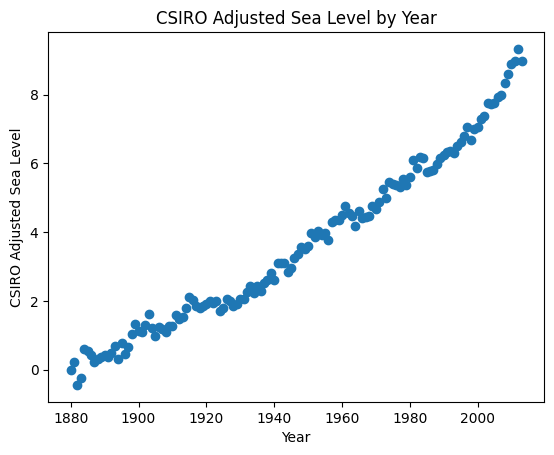

In [91]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

plt.scatter(x,y)
plt.title('CSIRO Adjusted Sea Level by Year')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')


---
### Exercise 3 - Clean the data

The column NOAA has null values in a number of rows.  Clean the data, producing a new dataframe.


In [92]:
# dataset is copied not to rewrite raw data
# then copied dataset is cleaned via droping  null values
# futher operations done with cleaned dataset copy
cleaned_df = df.copy().dropna()
cleaned_df['NOAA Adjusted Sea Level']

113    6.297493
114    6.310934
115    6.452569
116    6.627631
117    6.733920
118    6.865806
119    6.848690
120    6.920582
121    7.087460
122    7.319698
123    7.488353
124    7.507933
125    7.644563
126    7.697420
127    7.702147
128    7.907365
129    8.046354
130    8.122973
131    8.053065
132    8.457058
133    8.546648
Name: NOAA Adjusted Sea Level, dtype: float64


### Exercise 3 - plot scatter graph for NOAA adjusted levels
---


Text(0, 0.5, 'NOAA Adjusted Sea Level')

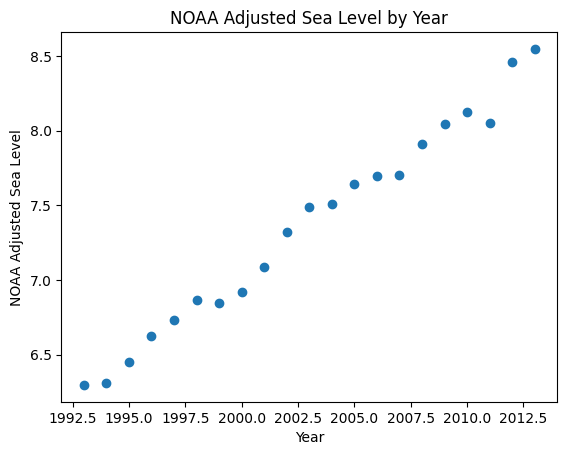

In [93]:
year = cleaned_df['Year']
noaa = cleaned_df['NOAA Adjusted Sea Level']
plt.scatter(year, noaa)
plt.title('NOAA Adjusted Sea Level by Year')
plt.xlabel('Year')
plt.ylabel('NOAA Adjusted Sea Level')

---
### Exercise 4 - plot line of best fit for CSIRO

*   Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit.
*   Plot the line of best fit over the top of the scatter plot.
*   Make the line go through the year 2050 to predict the sea level rise in 2050.    

*(Hint:  use numpy to create an array from the first year to 2050 with an increment of 1)*

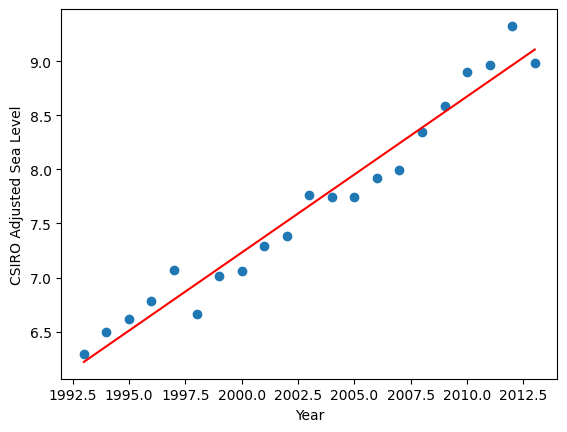

In [106]:
x = cleaned_df['Year']
y = cleaned_df['CSIRO Adjusted Sea Level']

plt.xlabel("Year")
plt.ylabel('CSIRO Adjusted Sea Level')
plt.scatter(x,y)
# get scope and y-intercept
reg = linregress(x, y)
slope = reg.slope
intercept = reg.intercept
plt.plot(x, slope*x + intercept, color='r')
plt.show()

In [95]:
slope*2010 + intercept

8.674913922228995

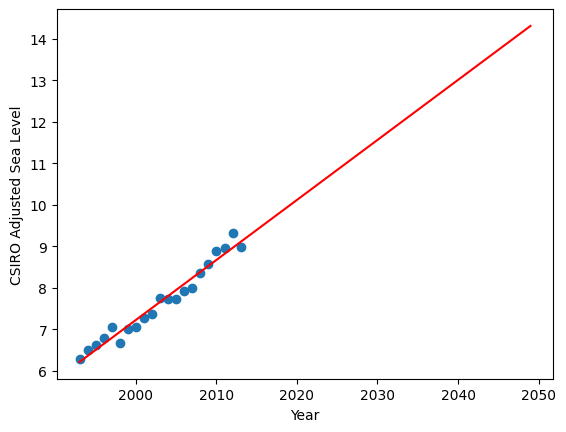

In [107]:
plt.xlabel("Year")
plt.ylabel('CSIRO Adjusted Sea Level')
plt.scatter(x,y)
# create an extended range for x to predict sea level in 2050
predict_year = np.arange(x.min(), 2050)
new_x = predict_year

# draw the scatter plot with line of best fit
plt.plot(new_x, slope * new_x + intercept, color='r')
plt.show()

In [97]:
print("The sea level pridicted in 2050:", round(slope * 2050 + intercept, 3))

The sea level pridicted in 2050: 14.452


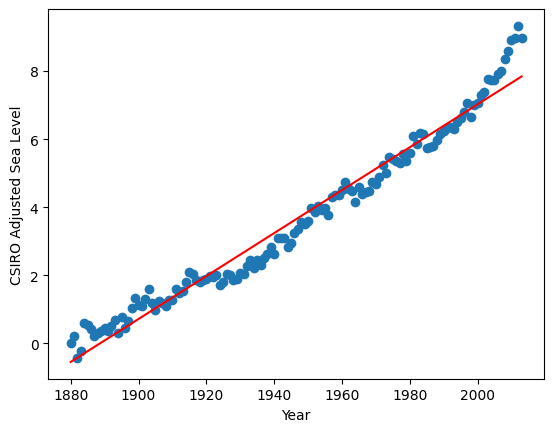

In [108]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

plt.xlabel("Year")
plt.ylabel('CSIRO Adjusted Sea Level')
plt.scatter(x,y)
# get scope and y-intercept
reg = linregress(x, y)
slope = reg.slope
intercept = reg.intercept
plt.plot(x, slope*x + intercept, color='r')
plt.show()

In [99]:
slope*2010 + intercept

7.653671896651161

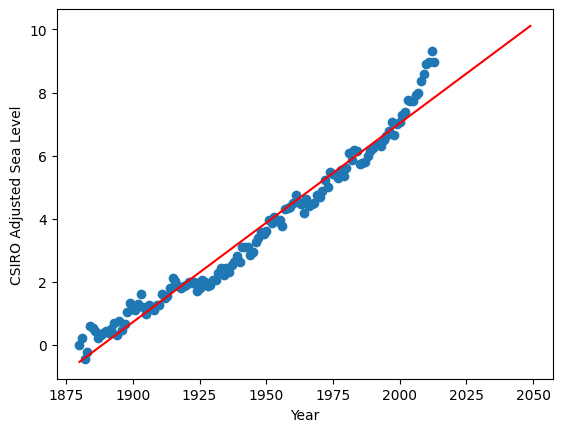

In [109]:
plt.xlabel("Year")
plt.ylabel('CSIRO Adjusted Sea Level')
plt.scatter(x,y)
# create an extended range for x to predict sea level in 2050
predict_year = np.arange(x.min(), 2050)
new_x = predict_year

# draw the scatter plot with line of best fit
plt.plot(new_x, slope * new_x + intercept, color='r')
plt.show()

In [101]:
print("The sea level pridicted in 2050:", round(slope * 2050 + intercept, 3))

The sea level pridicted in 2050: 10.175


### Exercise 5 - plot line of best fit for NOAA
---

*   Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit.
*   Plot the line of best fit over the top of the scatter plot.
*   Make the line go through the year 2030 to predict the sea level rise in 2030

*(Hint:  use numpy to create an array from the first year to 2030 with an increment of 1 AND remember to use noaa, which has NaN rows removed)*

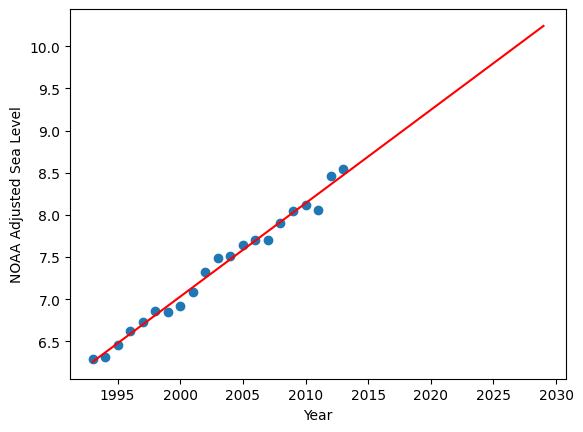

In [113]:
year = cleaned_df['Year']
noaa = cleaned_df['NOAA Adjusted Sea Level']
# get scope and y-intercept
noaa_reg = linregress(year, noaa)
slope = noaa_reg.slope
intercept = noaa_reg.intercept
# create an extended range for x to predict sea level in 2030
pred_year = np.arange(year.min(), 2030)
# draw the scatter plot with line of best fit
plt.xlabel("Year")
plt.ylabel('NOAA Adjusted Sea Level')
plt.scatter(year,noaa)
plt.plot(pred_year, slope * pred_year + intercept, color='r')
plt.show()

In [103]:
# predict the sea level rise in 2030
print("Possible sea level rise in 2030 accordind lineal regression", round(slope * 2030 + intercept, 3))

Possible sea level rise in 2030 accordind lineal regression 10.352



### Exercise 6 - shorter range (starting 2000)
---

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset and using the CSIRO adjusted levels. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

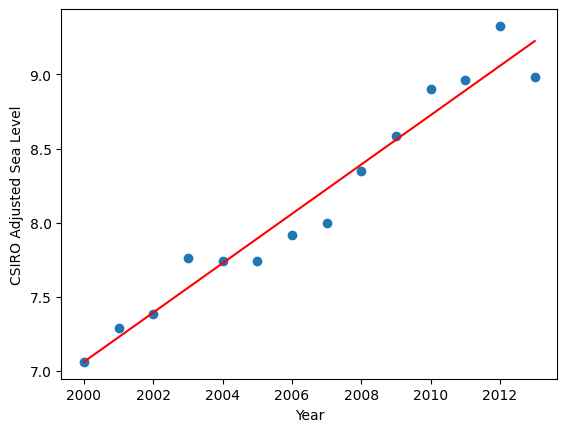

In [111]:
# get scope and y-intercept
df_cut = df[df['Year'] >= 2000]
year = df_cut['Year']
csiro = df_cut['CSIRO Adjusted Sea Level']

# create an extended range for x to predict sea level in 2050
csiro_reg = linregress(year, csiro)
pred_year = np.arange(year.min(), 2050)
slope = csiro_reg.slope
intercept = csiro_reg.intercept

# draw the scatter plot with line of best fit
plt.xlabel("Year")
plt.ylabel('CSIRO Adjusted Sea Level')
plt.scatter(year, csiro)
plt.plot(year, slope * year + intercept, color='r')
plt.show()

In [112]:
# predict the sea level rise in 2050
print("Possible sea level rise in 2050 accordind lineal regression", round(slope * 2050 + intercept, 3))

Possible sea level rise in 2050 accordind lineal regression 15.382


### Exercise 6 - add labels to the axes  
---

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level"

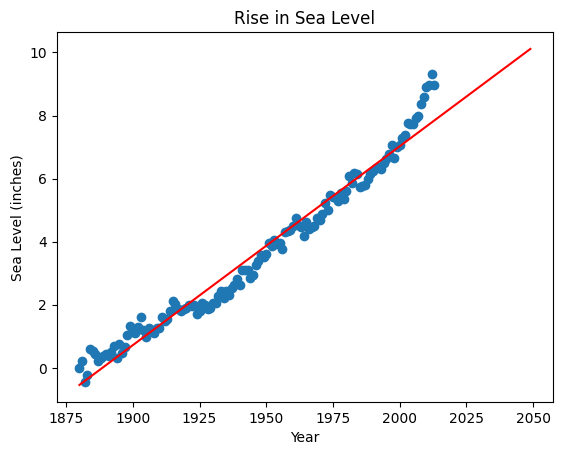

In [105]:
# get scope and y-intercept
year = df['Year']
csiro = df['CSIRO Adjusted Sea Level']

# create an extended range for x to predict sea level in 2050
csiro_reg = linregress(year, csiro)
pred_year = np.arange(year.min(), 2050)
slope = csiro_reg.slope
intercept = csiro_reg.intercept

# draw the scatter plot with line of best fit
plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.scatter(year, csiro)
plt.plot(pred_year, slope * pred_year + intercept, color='r')
plt.show()

# **Summary**

During the discovery a dataset some libriaries have been used:

- **Pandas**: A library for data manipulation and analysis, featuring data structures like DataFrames for handling tabular data efficiently.
- **Matplotlib**: A visualization library used for creating a wide range of static, animated, and interactive graphs and plots.
- **SciPy**: Focuses on scientific computing, offering tools for optimization, linear algebra, integration, and other advanced mathematical and scientific functions.
- **NumPy**: Essential for numerical computing, providing support for large, multi-dimensional arrays and matrices, along with a vast collection of high-level mathematical functions.


The main tasks of a research are to load data via link, understand data, using stats functions, and clean dataset before making predictons.

**Dataset exploring findings**

1. **DataFrame Information**:
   - The DataFrame consists of 134 entries, which correspond to the years from 1880 to 2013.
   - There are 5 columns: 'Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound', and 'NOAA Adjusted Sea Level'.
   - The `.shape` method confirms that there are 134 rows and 5 columns.
   - Each column, except NOAA Adjusted Sea Level, has 134 non-null values. NOAA Adjusted Sea Level column has 21 non-null values.
   - The DataFrame uses 5.4 KB of memory.
   
2. **Statistical Summary**:
  - The 'Year' column ranges from 1880 to 2013, with a mean around 1946, which is the midpoint of the range.
  - The 'CSIRO Adjusted Sea Level' column has a mean of 3.650341, suggesting that on average, sea levels have risen by this amount, though the unit is not specified.
  - The 'Lower Error Bound' and 'Upper Error Bound' columns provide the range of uncertainty around the 'CSIRO Adjusted Sea Level'. The mean values of these error bounds are 3.204666 and 4.096016, respectively.
  - The 'NOAA Adjusted Sea Level' mean is higher at 7.363746, suggesting that the NOAA adjustments result in higher sea level measurements than the CSIRO adjustments.

3. **Analysis of Sea Level Adjustments**:
   - The minimum and maximum values, as well as the quartiles, indicate the distribution and spread of the sea level measurements.
   - The difference between the CSIRO and NOAA sea level adjustments could be due to different methodologies or reference baselines used by each organization.

4. **Yearly Distribution**:
   - The standard deviation (std) values indicate the variability in the measurements. For example, the 'CSIRO Adjusted Sea Level' has a standard deviation of 2.485692, which is relatively low compared to its mean, suggesting the data points are not spread out too widely from the mean.


**Vizualization, lineal regression, predictions**

The visualization effectively communicates the trend of rising sea levels over the time period covered by the dataset, and the line of best fit suggests this trend is likely to continue into the future.

Possible **CSIRO** sea level rise in 2050 accordind lineal regression **10.175**

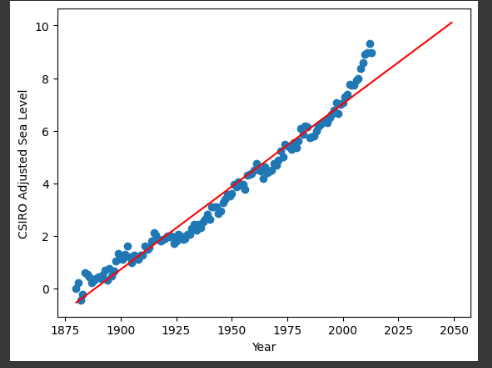

Possible **NOAA** sea level rise in 2030 accordind lineal regression **10.352**

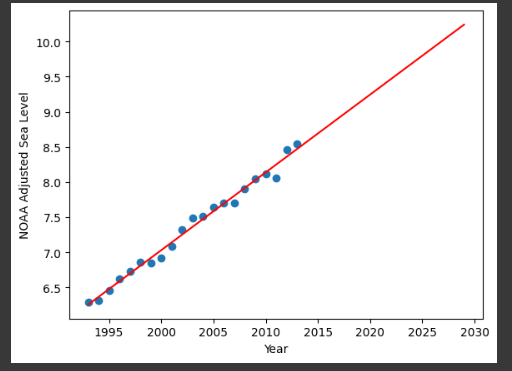


**Results and insights**

The number of data points (observations) used to train the model can significantly affect the accuracy of the predictions. Generally, more data points can provide a more accurate model because they offer a more comprehensive view of the trends and variability in the data.

Example Exercise 4 - plot line of best fit for CSIRO

Using 134 tuples and 21 tuples to train tha lineal regression shows different results such:
The CSIRO sea level pridicted in 2050 based on **21** tuples: **14.452**
The CSIRO sea level pridicted in 2050 based on **134** tuples: **10.175**

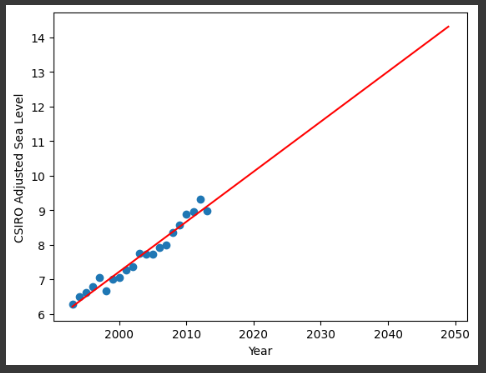

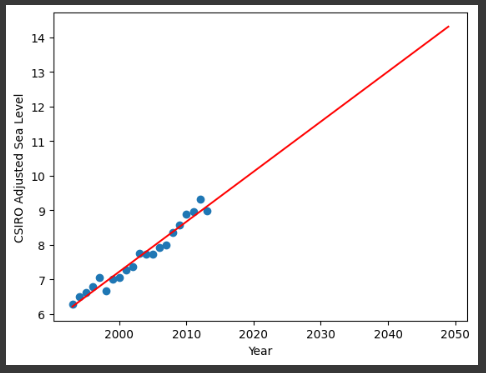

However, while having more data points generally helps build a more accurate model, the quality of the data and adherence to the model's assumptions are also crucial for the model's predictive accuracy. It's essential to balance quantity with quality and to understand the underlying relationships within the data when using linear regression.